In [1]:
import numpy as np

In [267]:
import os

In [6]:
import tables

In [7]:
import pandas as pd

In [8]:
from scipy.interpolate import interp1d

In [9]:
import matplotlib.pyplot as plt

In [2]:
import vrpy_tools

In [11]:
def Omega(z, Om0):
    E = Om0 * (1+z)**3 + (1-Om0)
    return Om0 * (1+z)**3 / E

def Del_vir(Om):
    x = Om - 1
    return (18*np.pi**2 + 82*x - 39*x**2)

def Delv(z, Om0):
    return Del_vir(Omega(z, Om0))

In [12]:
simh5 = tables.open_file('/scratch/cprem/download/IllTNG/TNG300-1/simulation.hdf5')
simh5.root.Groups['98'].Group

/Groups/98/Group (Group) ''
  children := ['GroupBHMass' (Array), 'GroupBHMdot' (Array), 'GroupCM' (Array), 'GroupFirstSub' (Array), 'GroupGasMetalFractions' (Array), 'GroupGasMetallicity' (Array), 'GroupLen' (Array), 'GroupLenType' (Array), 'GroupMass' (Array), 'GroupMassType' (Array), 'GroupNsubs' (Array), 'GroupPos' (Array), 'GroupSFR' (Array), 'GroupStarMetalFractions' (Array), 'GroupStarMetallicity' (Array), 'GroupVel' (Array), 'GroupWindMass' (Array), 'Group_M_Crit200' (Array), 'Group_M_Crit500' (Array), 'Group_M_Mean200' (Array), 'Group_M_TopHat200' (Array), 'Group_R_Crit200' (Array), 'Group_R_Crit500' (Array), 'Group_R_Mean200' (Array), 'Group_R_TopHat200' (Array)]

In [13]:
# hals = tables.open_file("/scratch/cprem/download/IllTNG/TNG300-1-Dark/output/groups_098/fof_subhalo_tab_098.12.hdf5", 'r')

In [14]:
hals = simh5.root.Groups['98'].Group

In [15]:
hals

/Groups/98/Group (Group) ''
  children := ['GroupBHMass' (Array), 'GroupBHMdot' (Array), 'GroupCM' (Array), 'GroupFirstSub' (Array), 'GroupGasMetalFractions' (Array), 'GroupGasMetallicity' (Array), 'GroupLen' (Array), 'GroupLenType' (Array), 'GroupMass' (Array), 'GroupMassType' (Array), 'GroupNsubs' (Array), 'GroupPos' (Array), 'GroupSFR' (Array), 'GroupStarMetalFractions' (Array), 'GroupStarMetallicity' (Array), 'GroupVel' (Array), 'GroupWindMass' (Array), 'Group_M_Crit200' (Array), 'Group_M_Crit500' (Array), 'Group_M_Mean200' (Array), 'Group_M_TopHat200' (Array), 'Group_R_Crit200' (Array), 'Group_R_Crit500' (Array), 'Group_R_Mean200' (Array), 'Group_R_TopHat200' (Array)]

In [16]:
# Om0 = hals.root.Parameters.attrs.Omega0
Om0 = 0.3089

In [17]:
Om0

0.3089

In [18]:
hals.Group_M_TopHat200

/Groups/98/Group/Group_M_TopHat200 (Array(17652241,)) ''
  atom := Float32Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None

In [19]:
hi =slice(None)

In [20]:
# Rv = hals.Group_R_TopHat200[hi]
# Rh = hals.Group_R_Crit200[hi]
# Mv = hals.Group_M_TopHat200[hi]
# Mh = hals.Group_M_Crit200[hi]
# Dlv = Delv(0,Om0)
# Dlh = 200

In [21]:
Rv = hals.Group_R_Crit200[hi]
Rh = hals.Group_R_Crit500[hi]
Mv = hals.Group_M_Crit200[hi]
Mh = hals.Group_M_Crit500[hi]
Dlv = 200
Dlh = 500

In [196]:
Rv.shape

(60124,)

In [397]:
Mv/Rv**3 / Dlv

array([1.15842190e-07, 1.15796693e-07, 1.15851100e-07, ...,
       1.15850545e-07, 1.15826345e-07, 1.15861593e-07])

In [398]:
Mh/Rh**3 / Dlh

ValueError: operands could not be broadcast together with shapes (218237,) (136653,) 

In [199]:
Delv(0,Om0)/200

0.5117776501480422

In [200]:
Dlv/Dlh

0.2

In [201]:
Del_vir(.3)

101.14287921960845

In [202]:
Om0

0.3089

In [203]:
def f(x):
    return x**3 *( np.log(1+1/x) - 1/(1+x) )
def f_inv(f):
    a1,a2,a3,a4 = 0.5116, -0.4283, -3.13e-3, -3.52e-5
    p = a2 + a3*np.log(f) + a4*np.log(f)**2
    return ( a1*f**(2*p) + (9/16) )**(-1/2) +2*f

In [204]:
rr = Rv[:5]/Rh[:5]
rr

array([1.86793499, 2.09078853, 2.02535886, 1.95308911, 2.06074726])

In [205]:
x = np.linspace(1e-2,1e-1)
x

array([0.01      , 0.01183673, 0.01367347, 0.0155102 , 0.01734694,
       0.01918367, 0.02102041, 0.02285714, 0.02469388, 0.02653061,
       0.02836735, 0.03020408, 0.03204082, 0.03387755, 0.03571429,
       0.03755102, 0.03938776, 0.04122449, 0.04306122, 0.04489796,
       0.04673469, 0.04857143, 0.05040816, 0.0522449 , 0.05408163,
       0.05591837, 0.0577551 , 0.05959184, 0.06142857, 0.06326531,
       0.06510204, 0.06693878, 0.06877551, 0.07061224, 0.07244898,
       0.07428571, 0.07612245, 0.07795918, 0.07979592, 0.08163265,
       0.08346939, 0.08530612, 0.08714286, 0.08897959, 0.09081633,
       0.09265306, 0.0944898 , 0.09632653, 0.09816327, 0.1       ])

In [206]:
f(x)

array([3.62502151e-06, 5.73817075e-06, 8.48577544e-06, 1.19284640e-05,
       1.61223594e-05, 2.11196770e-05, 2.69691929e-05, 3.37166218e-05,
       4.14049268e-05, 5.00745793e-05, 5.97637790e-05, 7.05086432e-05,
       8.23433710e-05, 9.53003870e-05, 1.09410468e-04, 1.24702855e-04,
       1.41205357e-04, 1.58944438e-04, 1.77945300e-04, 1.98231960e-04,
       2.19827312e-04, 2.42753195e-04, 2.67030449e-04, 2.92678962e-04,
       3.19717725e-04, 3.48164872e-04, 3.78037727e-04, 4.09352835e-04,
       4.42126006e-04, 4.76372343e-04, 5.12106276e-04, 5.49341592e-04,
       5.88091461e-04, 6.28368463e-04, 6.70184615e-04, 7.13551387e-04,
       7.58479735e-04, 8.04980110e-04, 8.53062487e-04, 9.02736377e-04,
       9.54010850e-04, 1.00689455e-03, 1.06139570e-03, 1.11752215e-03,
       1.17528134e-03, 1.23468036e-03, 1.29572595e-03, 1.35842449e-03,
       1.42278205e-03, 1.48880436e-03])

In [207]:
f_inv(f(x))-x

array([-2.59247736e-05, -2.71557663e-05, -2.68993412e-05, -2.54749793e-05,
       -2.31436995e-05, -2.01191099e-05, -1.65766891e-05, -1.26611861e-05,
       -8.49243880e-06, -4.16994807e-06,  2.23508884e-07,  4.61900183e-06,
        8.95913929e-06,  1.31962011e-05,  1.72906159e-05,  2.12097098e-05,
        2.49266722e-05,  2.84196943e-05,  3.16712471e-05,  3.46674747e-05,
        3.73976795e-05,  3.98538849e-05,  4.20304622e-05,  4.39238101e-05,
        4.55320793e-05,  4.68549347e-05,  4.78933491e-05,  4.86494244e-05,
        4.91262358e-05,  4.93276959e-05,  4.92584357e-05,  4.89237004e-05,
        4.83292578e-05,  4.74813184e-05,  4.63864639e-05,  4.50515853e-05,
        4.34838279e-05,  4.16905425e-05,  3.96792427e-05,  3.74575669e-05,
        3.50332449e-05,  3.24140681e-05,  2.96078636e-05,  2.66224709e-05,
        2.34657217e-05,  2.01454218e-05,  1.66693352e-05,  1.30451705e-05,
        9.28056831e-06,  5.38309099e-06])

In [234]:
def g(c, rr):
    return f(rr/c) / f(1/c)

In [242]:
c = .1#5.305

In [243]:
for i in range(100):
#     c_mod = Rv_Rh / f_inv( Dlh/Dlv * f(1/c))
#     print(c,g(c,rr))
    c_prev, c = c, c* (Dlh/Dlv / g(c, rr))#**5
    if abs(c_prev-c).all()<1e-5:
        print(i,c); break
    
print(c)

[29.3936085   5.345305    7.30545699 11.68924499  6.11006951]


In [244]:
(Dlh/Dlv)

5.0

In [245]:
g(c, rr)

array([4.99991737, 5.        , 5.        , 4.99999987, 5.        ])

In [246]:
c_ls = np.linspace(1,30)

Text(0, 0.5, 'f(Rv/Rh* 1/c) / f(1/c)')

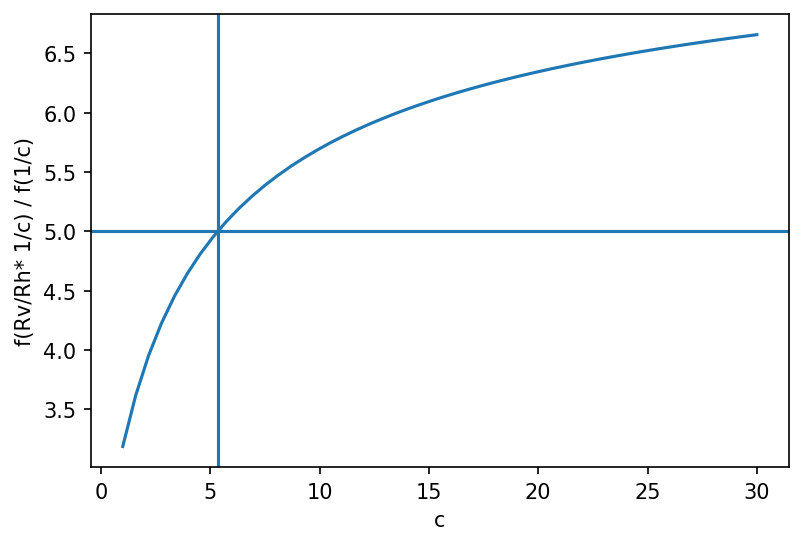

In [247]:
plt.figure(dpi=150)
plt.plot(c_ls,g(c_ls, rr[1]))
plt.axhline(Dlh/Dlv)
plt.axvline(c[1])
plt.xlabel('c')
plt.ylabel('f(Rv/Rh* 1/c) / f(1/c)')

In [248]:
Dlh/Dlv

5.0

In [42]:
Mv

array([1.0306854e+05, 8.7936055e+04, 6.9508570e+04, ..., 5.9751414e-02,
       5.5767983e-02, 0.0000000e+00], dtype=float32)

In [293]:
class M_conv_NFW:
    def __init__(self, Mass_vir, Del_vir, Rad_vir=None):
        self.Rv = Rad_vir
        self.Mv = Mass_vir
        self.Dlv = Del_vir
    def set_MR(self, Mh, Dlh, Rh=None):
        self.Rh = Rh
        self.Mh = Mh
        self.Dlh = Dlh
        
        self.Del_h_v = self.Dlh/self.Dlv
        self.rr = (self.Del_h_v * self.Mv/self.Mh)**(1/3)     #self.Rv/self.Rh
    
    def f(self,x):
        return x**3 *( np.log(1+1/x) - 1/(1+x) )
    def f_inv(self,f):
        a1,a2,a3,a4 = 0.5116, -0.4283, -3.13e-3, -3.52e-5
        p = a2 + a3*np.log(f) + a4*np.log(f)**2
        return ( a1*f**(2*p) + (9/16) )**(-1/2) +2*f
    
    def g(self, c, rr):
#         rr = self.Rv/self.Rh
        return self.f(rr/c) / self.f(1/c)
    
    def solve_c(self):
#         print(self.g(1))
        c = .1
        for i in range(100):
#             print(c,g(c,self.rr))
        #     c = Rv_Rh / f_inv( Dlh/Dlv * f(1/c))
            c_prev, c = c, c* ( self.Del_h_v / self.g(c, self.rr))**1
            if (abs(c_prev-c)<1e-5).all():
                print(i,c); break
        self.c = c
        return c

In [294]:
halprof = M_conv_NFW(Mv, Dlv)  #[:5000]

In [295]:
halprof.set_MR(Mh, Dlh)

<ipython-input-293-bb3a94d4953f>:12: RuntimeWarning: invalid value encountered in power
  self.rr = (self.Del_h_v * self.Mv/self.Mh)**(1/3)     #self.Rv/self.Rh


In [296]:
c = halprof.solve_c()
c

<ipython-input-293-bb3a94d4953f>:15: RuntimeWarning: overflow encountered in power
  return x**3 *( np.log(1+1/x) - 1/(1+x) )
<ipython-input-293-bb3a94d4953f>:23: RuntimeWarning: invalid value encountered in true_divide
  return self.f(rr/c) / self.f(1/c)
<ipython-input-293-bb3a94d4953f>:23: RuntimeWarning: divide by zero encountered in true_divide
  return self.f(rr/c) / self.f(1/c)
<ipython-input-293-bb3a94d4953f>:15: RuntimeWarning: invalid value encountered in multiply
  return x**3 *( np.log(1+1/x) - 1/(1+x) )


array([ 3.41633072,  8.46603122,  8.39492483, ...,  4.81318892,
       11.62685855,  0.66328685])

In [257]:
np.round(halprof.g(c, halprof.rr)-Dlh/Dlv, 4).sum()

array([-0., -0., -0., ..., -4., -4., -4.])

In [43]:
df = pd.DataFrame(data={'Mv':halprof.Mv*1e10,'c':halprof.c})

In [44]:
df.dropna(inplace=True)

In [46]:
# df

In [46]:
bins= np.logspace(9,15,50)

In [47]:
df_grpd = df.groupby(pd.cut(df.Mv,bins))

In [48]:
df_med = df_grpd.median()
df_1sig_l = df_grpd.quantile(.16)
df_1sig_r = df_grpd.quantile(.84)

In [49]:
6

6

In [51]:
# df_med

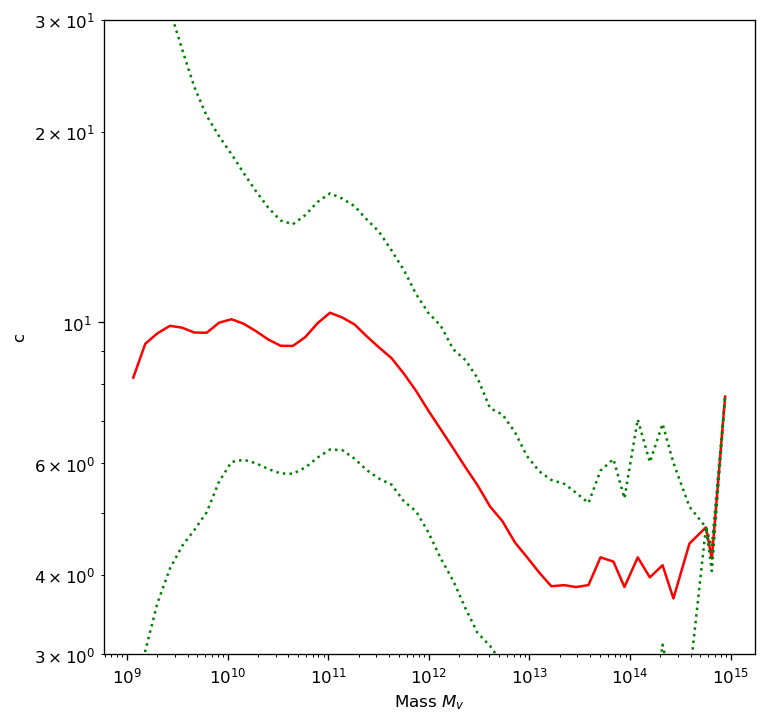

In [55]:
plt.figure(dpi=120, figsize=(7,7))
plt.plot(df_med.Mv, df_med.c, 'r')
plt.plot(df_med.Mv, df_1sig_l.c, 'g:')
plt.plot(df_med.Mv, df_1sig_r.c, 'g:')
# plt.loglog(Mv*1e10, c, 'o')
plt.xscale('log')
plt.yscale('log')
# plt.xlim(5e10)
plt.ylim(3,30)
plt.xlabel('Mass $M_v$')
plt.ylabel('c')
# plt.savefig('plots/M-conc200_TNG300-1.pdf')

In [56]:
halprof.Mv

array([1.0306854e+05, 8.7936055e+04, 6.9508570e+04, ..., 5.9751414e-02,
       5.5767983e-02, 0.0000000e+00], dtype=float32)

In [101]:
Mc200_df = pd.DataFrame(data = {'M200c':halprof.Mv*1e0, 'M500c (x10^10 h-1 M_O)':halprof.Mh*1e0, 'c200c':halprof.c })

In [108]:
Mc200_df_sample = Mc200_df.loc[Mc200_df.M200c.between(1e1,1e3)].dropna().sample(10000, random_state=1)

In [113]:
Mc200_df_sample.to_csv('mass_conc_sample.csv', index=False, sep='\t')

In [267]:
# @np.vectorize
# def solve_c(Rv,Mv,Dlv, Rh,Mh,Dlh):
#     halprof = M_conv_NFW(Rv,Mv,Dlv)
#     halprof.set_MR(Mh,Rh, Dlh)
#     return halprof.solve_c()

In [135]:
# solve_c(Rv,Mv,Dlv, Rh,Mh,Dlh)

In [2]:
# df

In [1]:
# df.dropna()

In [275]:
hi =slice(None)

In [272]:
L=150
N = 512
i=20
rund='r7'

In [270]:
snapfile_dmo = f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18/{rund:s}/snaps/snapdir_{i:03d}/snapshot_{i:03d}"
snapfile = f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18_bar/{rund:s}/snaps/snapdir_{i:03d}/snapshot_{i:03d}"

In [220]:
siminfo = vrpy_tools.ReadSimInfo(f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18/{rund:s}/halos_vr_6d/out_{i:03d}")

In [279]:
config = vrpy_tools.ReadConfigInfo(f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18/{rund:s}/halos_vr_6d/out_{i:03d}")

In [280]:
hal_vr_dict, N_hal_tot_vr = vrpy_tools.ReadPropertyFile(f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18/{rund:s}/halos_vr_6d/out_{i:03d}", ibinary=2, isiminfo=False, iunitinfo=False, iconfiginfo=False)
hal_vr_all = pd.DataFrame.from_dict(hal_vr_dict)
hal_vr_all.set_index('ID', inplace=True)
hal_vr_all = hal_vr_all.loc[hal_vr_all.hostHaloID==-1]

In [308]:
hal_vr_all.cNFW #/ hal_vr_all.Rvir  * hal_vr_all.R_200crit

ID
1         1.990814
2         4.725057
3         5.013645
4         3.176681
5         3.888108
            ...   
167805    1.822812
167806    4.559512
167807    1.651348
167808    3.521340
167809    3.540665
Name: cNFW, Length: 136653, dtype: float64

In [297]:
Rv = hal_vr_all.SO_R_100_rhocrit.to_numpy()[hi]
Rh = hal_vr_all.SO_R_500_rhocrit.to_numpy()[hi]
Mv = hal_vr_all.SO_Mass_100_rhocrit.to_numpy()[hi]
Mh = hal_vr_all.SO_Mass_500_rhocrit.to_numpy()[hi]
Dlv = 100 #Delv(0,Om0)
Dlh = 500

In [273]:
hal_rs_all = pd.read_csv(os.path.join(f'/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18/{rund:s}/halos_rs/out_wp_{i:d}.list'), sep=r'\s+', header=0, skiprows=list(range(1,16)), engine='c')
hal_rs_all.set_index('#ID', inplace=True)
hal_rs_all = hal_rs_all.loc[hal_rs_all.PID==-1]

In [396]:
Rv = hal_rs_all.Rvir.to_numpy()[hi]
Rs = hal_rs_all.Rs.to_numpy()[hi]
Mv = hal_rs_all.Mvir.to_numpy()[hi]/1e10
Mh = hal_rs_all.M500c.to_numpy()[hi]/1e10
Dlv = Delv(0,Om0)
Dlh = 500

In [378]:
Delv(0,Om0)

102.35553002960845

In [379]:
halprof = M_conv_NFW(Mv, Dlv)  #[:5000]

In [380]:
halprof.set_MR(Mh, Dlh)

<ipython-input-293-bb3a94d4953f>:12: RuntimeWarning: divide by zero encountered in true_divide
  self.rr = (self.Del_h_v * self.Mv/self.Mh)**(1/3)     #self.Rv/self.Rh


In [381]:
c = halprof.solve_c()
c

<ipython-input-293-bb3a94d4953f>:15: RuntimeWarning: invalid value encountered in multiply
  return x**3 *( np.log(1+1/x) - 1/(1+x) )
<ipython-input-293-bb3a94d4953f>:15: RuntimeWarning: overflow encountered in power
  return x**3 *( np.log(1+1/x) - 1/(1+x) )


array([        nan,  4.58371385,  5.92222108, ...,         nan,
       19.02976949,  1.85887819])

In [382]:
np.nan_to_num(np.round(halprof.g(c, halprof.rr)-Dlh/Dlv, 4))

<ipython-input-293-bb3a94d4953f>:23: RuntimeWarning: divide by zero encountered in true_divide
  return self.f(rr/c) / self.f(1/c)
<ipython-input-293-bb3a94d4953f>:15: RuntimeWarning: overflow encountered in power
  return x**3 *( np.log(1+1/x) - 1/(1+x) )
<ipython-input-293-bb3a94d4953f>:15: RuntimeWarning: invalid value encountered in multiply
  return x**3 *( np.log(1+1/x) - 1/(1+x) )


array([ 0., -0., -0., ...,  0., -0.,  0.])

In [383]:
c.shape

(218237,)

In [384]:
hal_vr_all.loc[hal_vr_all.hostHaloID>-1].shape

(0, 162)

In [400]:
df = pd.DataFrame(data={'Mv':halprof.Mv*1e10,'c':halprof.c, 'Rs':Rs, 'Rv':Rv, 'cRc':Rv/Rs})

In [401]:
df.dropna(inplace=True)

In [402]:
df

,Mv,c,Rs,Rv,cRc
1,1.000000e+12,4.583714,29.197,203.578,6.972566
2,7.482000e+10,5.922221,9.553,85.770,8.978331
3,7.268000e+10,7.803370,6.676,84.946,12.724086
5,7.910000e+10,5.002708,11.001,87.374,7.942369
6,5.772000e+10,2.208732,17.093,78.663,4.602059
...,...,...,...,...,...
218231,1.924000e+10,1.859090,12.219,54.542,4.463704
218232,4.105000e+11,45.723729,8.830,151.269,17.131257
218233,4.062000e+10,6.178829,7.495,69.968,9.335290
218235,1.432000e+11,19.029769,7.987,106.498,13.333918


In [403]:
bins= np.logspace(9,15,50)

In [404]:
df_grpd = df.groupby(pd.cut(df.Mv,bins))

In [405]:
df_med = df_grpd.median()
df_1sig_l = df_grpd.quantile(.16)
df_1sig_r = df_grpd.quantile(.84)

In [406]:
# df_med

Text(0, 0.5, 'c')

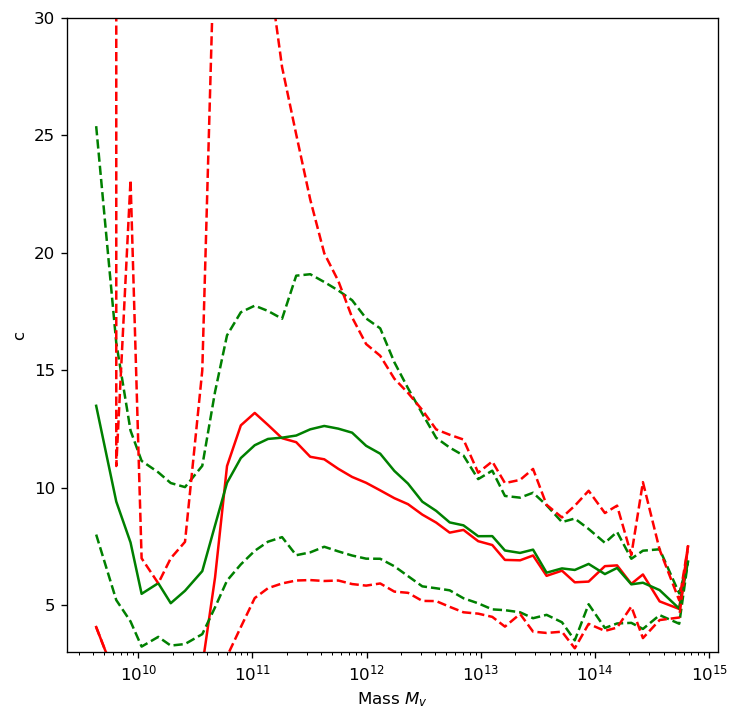

In [414]:
plt.figure(dpi=120, figsize=(7,7))
plt.plot(df_med.Mv, df_med.c, 'r')
plt.plot(df_med.Mv, df_med.cRc, 'g')
plt.plot(df_med.Mv, df_1sig_l.cRc, 'g--')
plt.plot(df_med.Mv, df_1sig_r.cRc, 'g--')
plt.plot(df_med.Mv, df_1sig_l.c, 'r--')
plt.plot(df_med.Mv, df_1sig_r.c, 'r--')
# plt.loglog(Mv*1e10, c, 'o')
plt.xscale('log')
# plt.yscale('log')
# plt.xlim(5e10)
plt.ylim(3,30)
plt.xlabel('Mass $M_v$')
plt.ylabel('c')
# plt.savefig('plots/M-conc_RS.pdf')